In [15]:
# Import necessary libraries

import numpy as np  # NumPy is a library for numerical operations
import matplotlib.pyplot as plt  # Matplotlib is a library for data visualization
from sklearn.datasets import make_regression  # Import a function to generate a regression dataset

In [16]:
# Define a bias term for the linear regression model
bias = 200

# Generate a synthetic dataset for simple linear regression using scikit-learn
# - n_features: The number of feature variables (independent variables), set to 1.
# - noise: The standard deviation of the noise added to the target, set to 10.
# - bias: The bias term (intercept) added to the target, set to 200.
# - random_state: Seed for reproducibility, set to 42.
# - coef: If True, return the true coefficient used to generate the data.
X, y, coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

# Print the shapes of the generated data arrays
# - X.shape: Shape of the feature matrix (X), which will be (number of samples, number of features).
# - y.shape: Shape of the target array (y), which will be (number of samples).
X.shape, y.shape


((100, 1), (100,))

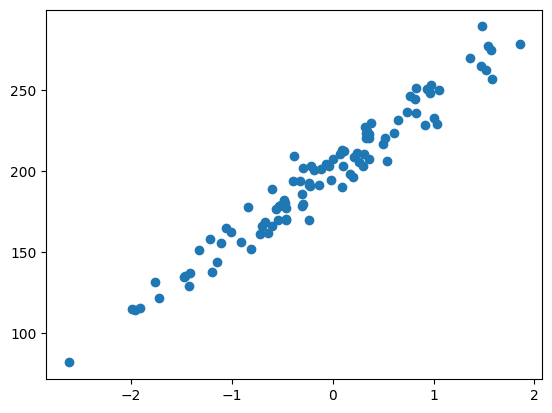

In [17]:
plt.scatter(X, y)

In [18]:
# Retrieve the true coefficient and bias used to generate the data
# - coef: The true coefficient of the linear relationship between X and y.
# - bias: The bias term (intercept) added to the data.
coef, bias

(array(41.74110031), 200)

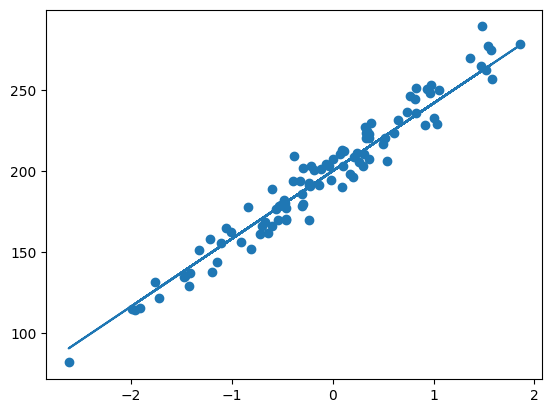

In [19]:
# Calculate the values of y_gen based on the true linear relationship
y_gen = X * coef + bias

# Create a scatter plot of the generated dataset
# - X: The feature variable (independent variable) values.
# - y: The target variable (dependent variable) values.
plt.scatter(X, y)

# Plot the true linear relationship
# - X: The feature variable values.
# - y_gen: The values calculated based on the true linear relationship.
plt.plot(X, y_gen)

In [22]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [23]:
# Retrieve the coefficients (slope) and intercept (bias) learned by the model during training
# - model.coef_: Coefficient(s) representing the relationship between features (X) and the target (y).
# - model.intercept_: Intercept term representing the bias in the model.
model.coef_, model.intercept_

(array([44.43716999]), 201.16511532052695)

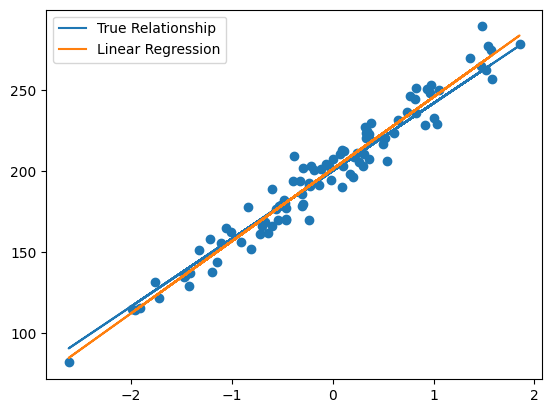

In [24]:
# Create a scatter plot of the generated dataset
# - X: The feature variable (independent variable) values.
# - y: The target variable (dependent variable) values.
plt.scatter(X, y)

# Plot the true linear relationship
# - X: The feature variable values.
# - y_gen: The values calculated based on the true linear relationship.
plt.plot(X, y_gen, label="True Relationship")

# Plot the linear regression line
# - X: The feature variable values.
# - model.predict(X): The predicted values using the trained linear regression model.
plt.plot(X, model.predict(X), label="Linear Regression")

# Add a legend to the plot to distinguish between the true relationship and the linear regression line
plt.legend()

In [25]:
class LinearRegCustom:
    """
    A custom implementation of simple linear regression using gradient descent.

    Parameters:
    - lr (float): Learning rate for gradient descent.

    Attributes:
    - coef_ (float): The coefficient representing the linear relationship.
    - intercept_ (float): The intercept term (bias) in the linear model.
    """

    # Constructor
    def __init__(self, lr=0.1):
        """
        Initialize the LinearRegCustom class.

        Parameters:
        - lr (float): Learning rate for gradient descent.
        """
        self.lr = lr

    # Training function, i.e., fit
    def fit(self, X, y):
        """
        Fit the model to the training data.

        Parameters:
        - X (numpy.ndarray): Feature variable (independent variable) values.
        - y (numpy.ndarray): Target variable (dependent variable) values.

        Returns:
        - errors (list): List of errors at each iteration during training.
        """
        self._X = X  # _X mock behavior like private
        self._y = y.reshape(-1, 1)  # Ensure correct shape for calculations

        # Initialize coefficients and intercept at random values
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()

        errors = []  # List to store errors during training

        # Perform gradient descent (e.g., 50 iterations)
        for i in range(50):
            self.gradient_descend()
            errors.append(self.error())
        return errors

    def gradient_descend(self):
        """
        Update coefficients and intercept using gradient descent.
        """
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr

    def gradient(self):
        """
        Compute the gradient of the cost function with respect to coefficients and intercept.

        Returns:
        - d_coef (float): Change in coefficient.
        - d_intercept (float): Change in intercept.
        """
        yh = self.predict(self._X)

        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()

        return d_coef, d_intercept

    def predict(self, X):
        """
        Predict target variable values based on feature variable values.

        Parameters:
        - X (numpy.ndarray): Feature variable (independent variable) values.

        Returns:
        - yh (numpy.ndarray): Predicted target variable values.
        """
        return X * self.coef_ + self.intercept_

    def error(self):
        """
        Calculate the mean squared error (MSE) for the model's predictions.

        Returns:
        - error (float): Mean squared error.
        """
        return ((self.predict(self._X) - self._y) ** 2).sum()


In [27]:
# Create an instance of the custom LinearRegCustom model with a learning rate of 0.1
model = LinearRegCustom(lr=0.1)

# Fit the custom model to the data
errors = model.fit(X, y)

# Retrieve the coefficients and intercept learned by the custom model during training
# - model.coef_: Coefficient representing the linear relationship between features (X) and the target (y).
# - model.intercept_: Intercept term representing the bias in the model.
model.coef_, model.intercept_

(42.74825863205244, 199.66340804531052)

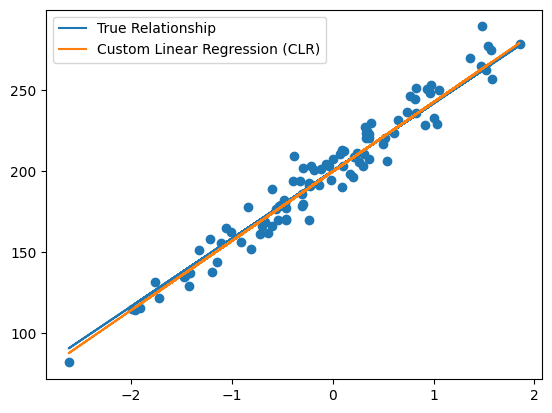

In [28]:
# Create a scatter plot of the generated dataset
# - X: The feature variable (independent variable) values.
# - y: The target variable (dependent variable) values.
plt.scatter(X, y)

# Plot the true relationship (y_gen) as a reference
# - X: The feature variable values.
# - y_gen: The values calculated based on the true linear relationship.
plt.plot(X, y_gen, label="True Relationship")

# Plot the predictions made by the custom linear regression model (CLR)
# - X: The feature variable values.
# - model.predict(X): The predicted values made by the custom linear regression model.
plt.plot(X, model.predict(X), label="Custom Linear Regression (CLR)")

# Add a legend to the plot to distinguish between the true relationship and the custom linear regression model
plt.legend()


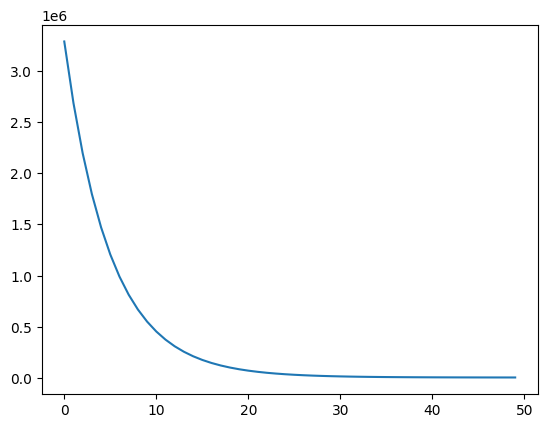

In [29]:
# Create a line plot to visualize the errors during the training process
# - errors: List of errors at each iteration during training.
plt.plot(errors)

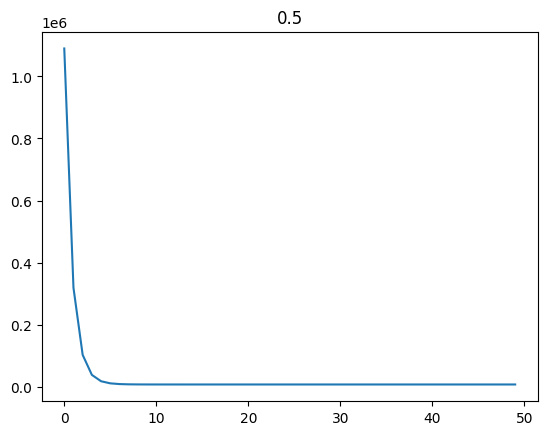

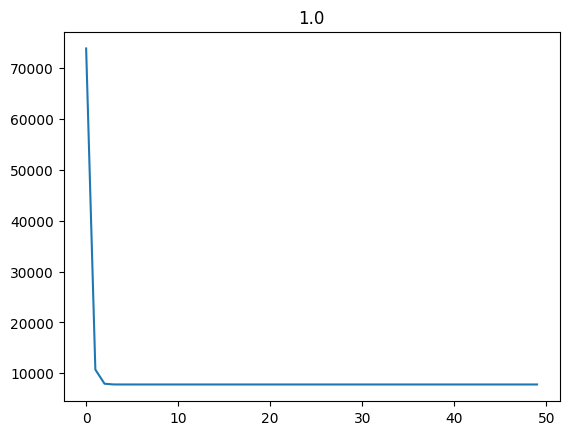

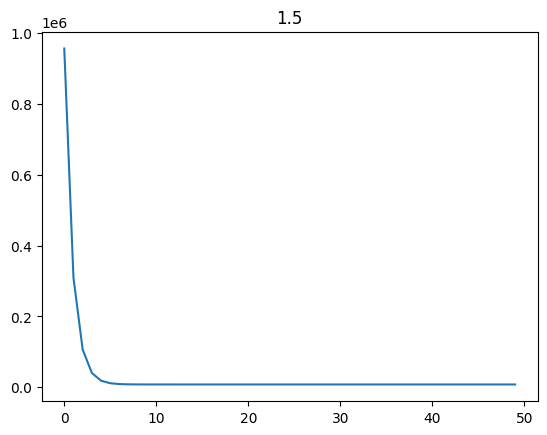

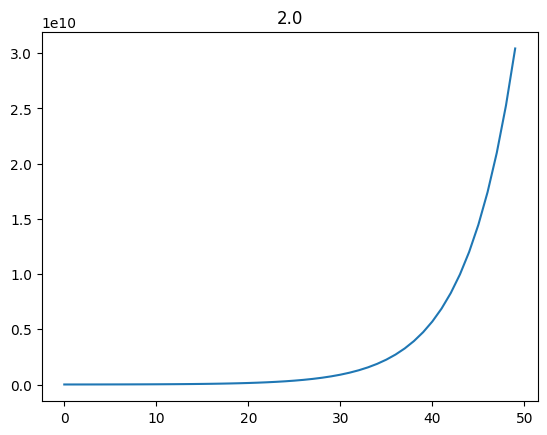

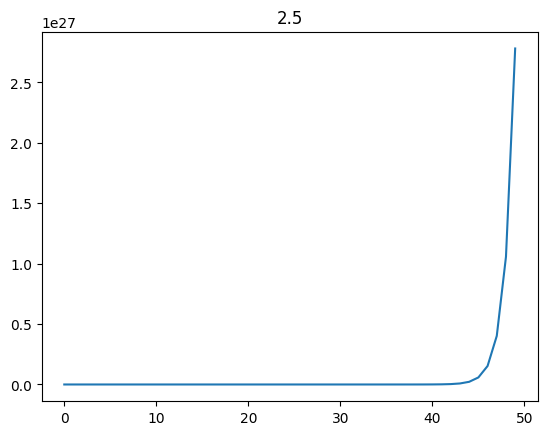

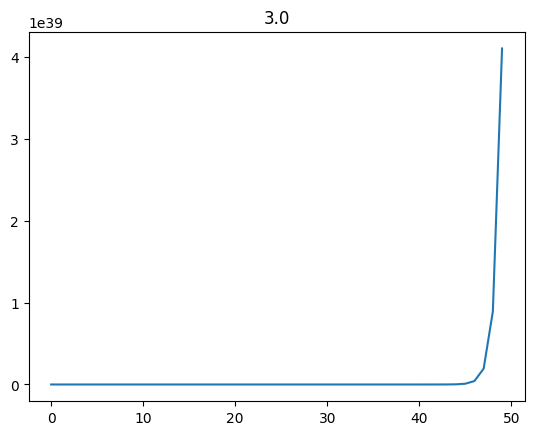

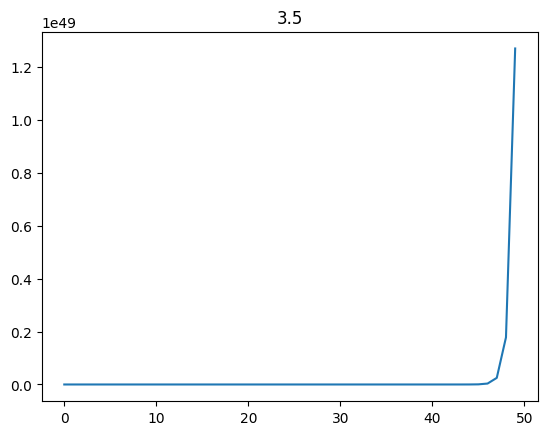

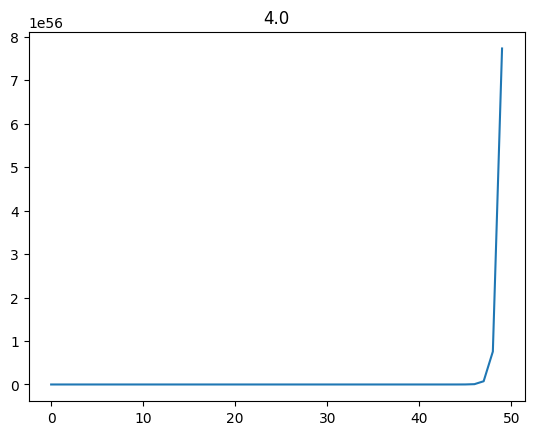

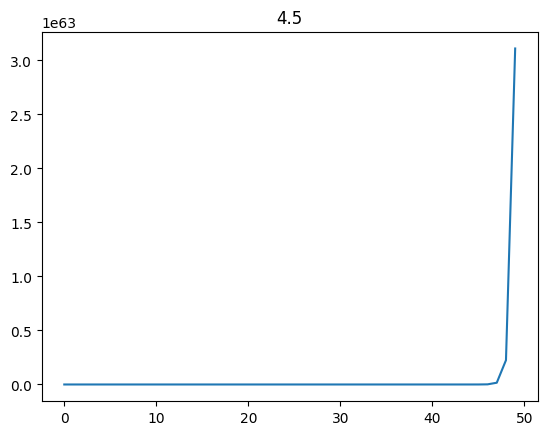

In [30]:
# Loop through different learning rates to train and visualize the errors
for i in range(1, 10):
    # Create an instance of the custom LinearRegCustom model with a learning rate based on the loop variable
    model = LinearRegCustom(lr=0.5 * i)
    
    # Fit the custom model to the data
    errors = model.fit(X, y)
    
    # Create a new figure for each learning rate
    plt.figure()
    
    # Set the title of the plot to indicate the current learning rate
    plt.title(str(0.5 * i))
    
    # Plot the errors over the course of training
    plt.plot(errors)